In [1]:
import pandas as pd
import sqlalchemy

In [2]:
pd.__version__

'0.23.3'

In [3]:
sqlalchemy.__version__

'1.2.15'

In [4]:
%run keys.py

# DataCamp [Joining Data in PostgresQL](https://www.datacamp.com/courses/joining-data-in-postgresql)

In [5]:
df_city = pd.read_sql_table('cities',engine)
df_city.head(5)

,name,country_code,city_proper_pop,metroarea_pop,urbanarea_pop
0,Abidjan,CIV,4765000.0,NaN,4765000.0
1,Abu Dhabi,ARE,1145000.0,NaN,1145000.0
2,Abuja,NGA,1235880.0,6000000.0,1235880.0
3,Accra,GHA,2070460.0,4010050.0,2070460.0
4,Addis Ababa,ETH,3103670.0,4567860.0,3103670.0


In [6]:
query_1 = """
SELECT cities.name AS city,
       countries.name AS country,
       region
FROM cities
INNER JOIN countries
ON cities.country_code = countries.code;"""

query1 = pd.read_sql_query(query_1, engine)
query1.head()

,city,country,region
0,Abidjan,Cote d'Ivoire,Western Africa
1,Abu Dhabi,United Arab Emirates,Middle East
2,Abuja,Nigeria,Western Africa
3,Accra,Ghana,Western Africa
4,Addis Ababa,Ethiopia,Eastern Africa


In [7]:
query_2 = """
SELECT c.code AS country_code, name, year, inflation_rate
FROM countries AS c
INNER JOIN economies AS e
ON c.code = e.code;"""

query2 = pd.read_sql_query(query_2, engine)
query2.head()

,country_code,name,year,inflation_rate
0,AFG,Afghanistan,2010,2.179
1,AFG,Afghanistan,2015,-1.549
2,AGO,Angola,2010,14.480
3,AGO,Angola,2015,10.287
4,ALB,Albania,2010,3.605


In [8]:
query_3 = """
SELECT code,
        name,
        region,
        year,
        fertility_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code"""

query3 = pd.read_sql_query(query_3, engine)
query3.head()

,code,name,region,year,fertility_rate
0,ABW,Aruba,Caribbean,2010,1.704
1,ABW,Aruba,Caribbean,2015,1.647
2,AFG,Afghanistan,Southern and Central Asia,2010,5.746
3,AFG,Afghanistan,Southern and Central Asia,2015,4.653
4,AGO,Angola,Central Africa,2010,6.416


In [9]:
query_4 = """
SELECT c.code, name, region, e.year, fertility_rate, unemployment_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code
INNER JOIN economies AS e
ON c.code = e.code;"""

query4 = pd.read_sql_query(query_4, engine)
query4.head()

,code,name,region,year,fertility_rate,unemployment_rate
0,AFG,Afghanistan,Southern and Central Asia,2015,5.746,NaN
1,AFG,Afghanistan,Southern and Central Asia,2010,5.746,NaN
2,AFG,Afghanistan,Southern and Central Asia,2015,4.653,NaN
3,AFG,Afghanistan,Southern and Central Asia,2010,4.653,NaN
4,AGO,Angola,Central Africa,2015,6.416,NaN


## There are issues with multiple year tracking:

In [10]:
query_4_issues = query4[query4.name == "Albania"]
query_4_issues

,code,name,region,year,fertility_rate,unemployment_rate
8,ALB,Albania,Southern Europe,2015,1.663,17.1
9,ALB,Albania,Southern Europe,2010,1.663,14.0
10,ALB,Albania,Southern Europe,2015,1.793,17.1
11,ALB,Albania,Southern Europe,2010,1.793,14.0


In [11]:
# SOLUTION:
query_5 = """
SELECT c.code, name, region, e.year, fertility_rate, unemployment_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code
INNER JOIN economies AS e
ON c.code = e.code AND p.year = e.year;"""

query5 = pd.read_sql_query(query_5, engine)
print(query5[query5.name == "Albania"])
query5.head()

  code     name           region  year  fertility_rate  unemployment_rate
4  ALB  Albania  Southern Europe  2010           1.663               14.0
5  ALB  Albania  Southern Europe  2015           1.793               17.1


,code,name,region,year,fertility_rate,unemployment_rate
0,AFG,Afghanistan,Southern and Central Asia,2010,5.746,NaN
1,AFG,Afghanistan,Southern and Central Asia,2015,4.653,NaN
2,AGO,Angola,Central Africa,2010,6.416,NaN
3,AGO,Angola,Central Africa,2015,5.996,NaN
4,ALB,Albania,Southern Europe,2010,1.663,14.0


In [12]:
query_6 = """
SELECT c.name AS country, continent, l.name AS language, official
FROM countries AS c
INNER JOIN languages AS l
USING(code);"""

query6 = pd.read_sql_query(query_6, engine)
query6.head()

,country,continent,language,official
0,Afghanistan,Asia,Dari,True
1,Afghanistan,Asia,Pashto,True
2,Afghanistan,Asia,Turkic,False
3,Afghanistan,Asia,Other,False
4,Albania,Europe,Albanian,True


# Self - Joins

In [13]:
query_7 = """
SELECT p1.country_code, 
       p1.size AS size2010,
       p2.size AS size2015
FROM populations AS p1
INNER JOIN populations AS p2
ON  p1.country_code = p2.country_code;"""

query7 = pd.read_sql_query(query_7, engine)
query7.head()

,country_code,size2010,size2015
0,ABW,101597.0,103889.0
1,ABW,101597.0,101597.0
2,ABW,103889.0,103889.0
3,ABW,103889.0,101597.0
4,AFG,27962200.0,32526600.0


## Omit the 3 entries per year that we are not interested in:

In [14]:
query_8 = """
SELECT p1.country_code, 
       p1.size AS size2010,
       p2.size AS size2015
FROM populations AS p1
INNER JOIN populations AS p2
ON p1.country_code = p2.country_code
    AND p1.year = p2.year - 5;"""

query8 = pd.read_sql_query(query_8, engine)
query8.head()

,country_code,size2010,size2015
0,ABW,101597.0,103889.0
1,AFG,27962200.0,32526600.0
2,AGO,21220000.0,25022000.0
3,ALB,2913020.0,2889170.0
4,AND,84419.0,70473.0


In [15]:
query_9 = """
SELECT p1.country_code, 
       p1.size AS size2010,
       p2.size AS size2015,
       ((p2.size - p1.size)/p1.size * 100.0) AS growth_perc
FROM populations AS p1
INNER JOIN populations AS p2
ON p1.country_code = p2.country_code
    AND p1.year = p2.year - 5;"""

query9 = pd.read_sql_query(query_9, engine)
query9.head()

,country_code,size2010,size2015,growth_perc
0,ABW,101597.0,103889.0,2.255972
1,AFG,27962200.0,32526600.0,16.323297
2,AGO,21220000.0,25022000.0,17.917192
3,ALB,2913020.0,2889170.0,-0.818875
4,AND,84419.0,70473.0,-16.519977


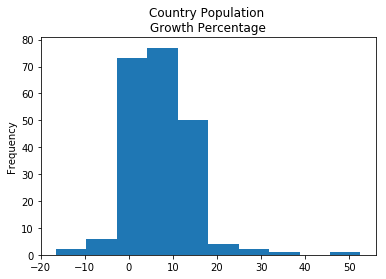

In [16]:
%matplotlib inline
query9.growth_perc.plot(kind='hist', title='Country Population \nGrowth Percentage')

In [17]:
query_10 = """
SELECT name, continent, code, surface_area,
        -- first case
    CASE WHEN surface_area > 2000000 THEN 'large'
        -- second case
        WHEN surface_area > 350000 THEN 'medium'
        -- else clause + end
        ELSE 'small' END
        AS geosize_group
FROM countries;"""

query10 = pd.read_sql_query(query_10, engine)
query10.head()

,name,continent,code,surface_area,geosize_group
0,Afghanistan,Asia,AFG,652090.0,medium
1,Netherlands,Europe,NLD,41526.0,small
2,Albania,Europe,ALB,28748.0,small
3,Algeria,Africa,DZA,2381740.0,large
4,American Samoa,Oceania,ASM,199.0,small


## Writing a query into a new table:

```SQL
SELECT name, continent, code, surface_area,
    CASE WHEN surface_area > 2000000
            THEN 'large'
       WHEN surface_area > 350000
            THEN 'medium'
       ELSE 'small' END
       AS geosize_group
INTO countries_plus
FROM countries;
```

In [18]:
query_11 = """
SELECT country_code, size,
    CASE WHEN size > 50000000 THEN 'large'
        WHEN size > 1000000 THEN 'medium'
        ELSE 'small' END
        AS popsize_group
INTO pop_plus
FROM populations
WHERE year = 2015;

SELECT name, continent, geosize_group, popsize_group
FROM countries_plus AS c
INNER JOIN pop_plus AS p
ON c.code = p.country_code
ORDER BY geosize_group"""

query11 = pd.read_sql_query(query_11, engine)
query11.head()

,name,continent,geosize_group,popsize_group
0,India,Asia,large,large
1,United States,North America,large,large
2,Saudi Arabia,Asia,large,medium
3,China,Asia,large,large
4,Kazakhstan,Asia,large,medium


# Inner vs. Outer Joins

In [19]:
query_12 = """
-- get the city name (and alias it), the country code,
-- the country name (and alias it), the region,
-- and the city proper population
SELECT c1.name AS city, code, c2.name AS country,
       region, city_proper_pop
-- specify left table
FROM cities AS c1
-- specify right table and type of join
INNER JOIN countries AS c2
-- how should the tables be matched?
ON c1.country_code = c2.code
-- sort based on descending country code
ORDER BY code DESC;"""

query12 = pd.read_sql_query(query_12, engine)
print('The length of the resulting table for INNER JOIN is:', len(query12))
query12.head()

The length of the resulting table for INNER JOIN is: 230


,city,code,country,region,city_proper_pop
0,Harare,ZWE,Zimbabwe,Eastern Africa,1606000.0
1,Lusaka,ZMB,Zambia,Eastern Africa,1742980.0
2,Cape Town,ZAF,South Africa,Southern Africa,3740030.0
3,Johannesburg,ZAF,South Africa,Southern Africa,4434830.0
4,Durban,ZAF,South Africa,Southern Africa,3442360.0


In [20]:
query_13 = """
-- get the city name (and alias it), the country code,
-- the country name (and alias it), the region,
-- and the city proper population
SELECT c1.name AS city, code, c2.name AS country,
       region, city_proper_pop
-- specify left table
FROM cities AS c1
-- specify right table and type of join
LEFT JOIN countries AS c2
-- how should the tables be matched?
ON c1.country_code = c2.code
-- sort based on descending country code
ORDER BY code DESC;"""

query13 = pd.read_sql_query(query_13, engine)
print('The length of the resulting table for LEFT JOIN is:', len(query13))
print('Therefore, there are', len(query13) - len(query12), 'records that are in the right table which are not in the left.')
query13.head(7)

The length of the resulting table for LEFT JOIN is: 236
Therefore, there are 6 records that are in the right table which are not in the left.


,city,code,country,region,city_proper_pop
0,Taichung,None,None,None,2752410.0
1,Tainan,None,None,None,1885250.0
2,Kaohsiung,None,None,None,2778920.0
3,Bucharest,None,None,None,1883420.0
4,Taipei,None,None,None,2704970.0
5,New Taipei City,None,None,None,3954930.0
6,Harare,ZWE,Zimbabwe,Eastern Africa,1606000.0


In [21]:
query_14 = """
/*
select country name AS country, the country's local name,
the language name AS language, and
the percent of the language spoken in the country
*/
SELECT c.name AS country, local_name, l.name AS language, percent
-- countries on the left (alias as c)
FROM countries AS c
-- appropriate join with languages (as l) on the right
LEFT JOIN languages AS l
-- give fields to match on
ON c.code = l.code
-- sort by descending country name
ORDER BY country DESC;"""

query14 = pd.read_sql_query(query_14, engine)
query14.head()

,country,local_name,language,percent
0,Zimbabwe,Zimbabwe,Chibarwe,NaN
1,Zimbabwe,Zimbabwe,Shona,NaN
2,Zimbabwe,Zimbabwe,Ndebele,NaN
3,Zimbabwe,Zimbabwe,English,NaN
4,Zimbabwe,Zimbabwe,Chewa,NaN


**Zimbabwe is included in the above table because it is `LEFT JOIN`ed and does not include the percentage of the population that speaks any of the indicated languages.**

In [22]:
query_15 = """
-- Select region, average gdp_percapita (alias avg_gdp)
SELECT region, AVG(gdp_percapita) AS avg_gdp
-- From countries (alias c) on the left
FROM countries AS c
-- Join with economies (alias e)
LEFT JOIN economies AS e
-- Match on code fields
ON c.code = e.code
-- Focus on 2010 
WHERE year = 2010
-- Group by region
GROUP BY region
-- Order by avg_gdp, descending
ORDER BY avg_gdp DESC;"""

query15 = pd.read_sql_query(query_15, engine)
query15.head()

,region,avg_gdp
0,Western Europe,58130.961496
1,Nordic Countries,57073.997656
2,North America,47911.509766
3,Australia and New Zealand,44792.384766
4,British Islands,43588.330078


In [23]:
query_16 = """
-- convert this code to use RIGHT JOINs instead of LEFT JOINs
/*
SELECT cities.name AS city, urbanarea_pop, countries.name AS country,
       indep_year, languages.name AS language, percent
FROM cities
LEFT JOIN countries
ON cities.country_code = countries.code
LEFT JOIN languages
ON countries.code = languages.code
ORDER BY city, language;
*/

SELECT cities.name AS city, urbanarea_pop, countries.name AS country,
       indep_year, languages.name AS language, percent
FROM languages
RIGHT JOIN countries
ON languages.code = countries.code
RIGHT JOIN cities
ON countries.code = cities.country_code
ORDER BY city, language;"""

query16 = pd.read_sql_query(query_16, engine)
query16.head()

,city,urbanarea_pop,country,indep_year,language,percent
0,Abidjan,4765000.0,Cote d'Ivoire,1960.0,French,NaN
1,Abidjan,4765000.0,Cote d'Ivoire,1960.0,Other,NaN
2,Abu Dhabi,1145000.0,United Arab Emirates,1971.0,Arabic,NaN
3,Abu Dhabi,1145000.0,United Arab Emirates,1971.0,English,NaN
4,Abu Dhabi,1145000.0,United Arab Emirates,1971.0,Hindi,NaN


In [24]:
query_17 = """
SELECT name AS country, code, region, basic_unit
FROM countries
FULL JOIN currencies
USING (code)
WHERE region = 'North America' OR region IS NULL
ORDER BY region;"""

query17 = pd.read_sql_query(query_17, engine)
query17.head()

,country,code,region,basic_unit
0,Canada,CAN,North America,Canadian dollar
1,United States,USA,North America,United States dollar
2,Bermuda,BMU,North America,Bermudian dollar
3,Greenland,GRL,North America,None
4,None,TMP,None,United States dollar


In [25]:
query_18 = """
SELECT c1.name AS country, region, l.name AS language,
       basic_unit, frac_unit
FROM countries AS c1
FULL JOIN languages AS l
USING (code)
FULL JOIN currencies AS c2
USING (code)
WHERE region LIKE 'M%%esia';"""

query18 = pd.read_sql_query(query_18, engine)
query18.head()

,country,region,language,basic_unit,frac_unit
0,Kiribati,Micronesia,English,Australian dollar,Cent
1,Kiribati,Micronesia,Kiribati,Australian dollar,Cent
2,Marshall Islands,Micronesia,Other,United States dollar,Cent
3,Marshall Islands,Micronesia,Marshallese,United States dollar,Cent
4,Nauru,Micronesia,Other,Australian dollar,Cent


In [26]:
query_19 = """
SELECT c.name AS city, l.name AS language
FROM cities AS c        
CROSS JOIN languages AS l
WHERE c.name LIKE 'Hyder%%';"""

query19 = pd.read_sql_query(query_19, engine)
query19.head()

,city,language
0,Hyderabad (India),Dari
1,Hyderabad,Dari
2,Hyderabad (India),Pashto
3,Hyderabad,Pashto
4,Hyderabad (India),Turkic


In [27]:
query_20 = """
SELECT c.name AS city, l.name AS language
FROM cities AS c        
INNER JOIN languages AS l
ON c.country_code = l.code
WHERE c.name LIKE 'Hyder%%';"""

query20 = pd.read_sql_query(query_20, engine)
query20.head()

,city,language
0,Hyderabad (India),Hindi
1,Hyderabad (India),Bengali
2,Hyderabad (India),Telugu
3,Hyderabad (India),Marathi
4,Hyderabad (India),Tamil


## In terms of life expectancy for 2010, determine the names of the lowest five countries and their regions.

In [28]:
query_21 = """
SELECT name AS country, region, life_expectancy AS life_exp

FROM countries AS c
LEFT JOIN populations AS p
ON c.code = p.country_code
WHERE year = 2010
ORDER BY life_expectancy
LIMIT 5"""

query21 = pd.read_sql_query(query_21, engine)
query21.head()

,country,region,life_exp
0,Lesotho,Southern Africa,47.4834
1,Central African Republic,Central Africa,47.6253
2,Sierra Leone,Western Africa,48.2290
3,Swaziland,Southern Africa,48.3458
4,Zimbabwe,Eastern Africa,49.5747


# Union Example

```SQL
SELECT prime_minister AS leader, country
FROM prime ministers
UNION
SELECT monarch, country
FROM monarchs
ORDER BY country;
```

In [29]:
query_22 = """
-- pick specified columns from 2010 table
SELECT *
-- 2010 table will be on top
FROM economies2010
-- which set theory clause?
UNION
-- pick specified columns from 2015 table
SELECT *
-- 2015 table on the bottom
FROM economies2015
-- order accordingly
ORDER BY code, year;"""

query22 = pd.read_sql_query(query_22, engine)
query22.head()

,code,year,income_group,gross_savings
0,AFG,2010,Low income,37.133
1,AFG,2015,Low income,21.466
2,AGO,2010,Upper middle income,23.534
3,AGO,2015,Upper middle income,-0.425
4,ALB,2010,Upper middle income,20.011


In [30]:
query_23 = """
SELECT country_code
FROM cities
UNION
SELECT code AS country_code
FROM currencies
ORDER BY country_code;"""

query23 = pd.read_sql_query(query_23, engine)
query23.head()

,country_code
0,ABW
1,AFG
2,AGO
3,AIA
4,ALB


# Union all

As you saw, duplicates were removed from the previous two exercises by using `UNION`.

To include duplicates, you can use `UNION ALL`.

In [31]:
query_24 = """
SELECT country_code AS code, year
FROM populations
UNION ALL
SELECT code , year
FROM economies
ORDER BY code, year;"""

query24 = pd.read_sql_query(query_24, engine)
query24.head()

,code,year
0,ABW,2010
1,ABW,2015
2,AFG,2010
3,AFG,2010
4,AFG,2015


# Intersect

In [32]:
query_25 = """
SELECT country_code AS code, year
FROM populations
INTERSECT
SELECT code , year
FROM economies
ORDER BY code, year;"""

query25 = pd.read_sql_query(query_25, engine)
query25.head()

,code,year
0,AFG,2010
1,AFG,2015
2,AGO,2010
3,AGO,2015
4,ALB,2010


In [33]:
query_26 = """
SELECT name
FROM countries
INTERSECT
SELECT name
FROM cities
ORDER BY name;"""

query26 = pd.read_sql_query(query_26, engine)
query26.head()

,name
0,Hong Kong
1,Singapore


# Except

In [34]:
query_27 = """
SELECT name
FROM cities
EXCEPT
SELECT capital
FROM countries
ORDER BY name;"""

query27 = pd.read_sql_query(query_27, engine)
query27.head()

,name
0,Abidjan
1,Ahmedabad
2,Alexandria
3,Almaty
4,Auckland


In [35]:
query_28 = """
SELECT capital
FROM countries
EXCEPT
SELECT name
FROM cities
ORDER BY capital;"""

query28 = pd.read_sql_query(query_28, engine)
query28.head()

,capital
0,Agana
1,Amman
2,Amsterdam
3,Andorra la Vella
4,Antananarivo


# Semi and Anti Joins

Example:

```SQL
SELECT president, country, continent
FROM presidents
WHERE continent LIKE '%America'
    AND country NOT IN
        (SELECT name
         FROM states
         WHERE indep_year < 1800)
```

## Semi Join Example:

In [36]:
query_29 = """
SELECT DISTINCT name
FROM languages
WHERE code IN
    (SELECT code
    FROM countries
    WHERE region = 'Middle East')
ORDER BY name;"""

query29 = pd.read_sql_query(query_29, engine)
query29.head()

,name
0,Arabic
1,Aramaic
2,Armenian
3,Azerbaijani
4,Azeri


# Anti Join Example:

In [37]:
query_30 = """
SELECT code, name
FROM countries
WHERE continent = 'Oceania'
  AND code NOT IN
  (SELECT code
   FROM currencies);"""

query30 = pd.read_sql_query(query_30, engine)
query30.head()

,code,name
0,ASM,American Samoa
1,FJI,Fiji Islands
2,GUM,Guam
3,FSM,"Micronesia, Federated States of"
4,MNP,Northern Mariana Islands


# Multiple Set Operations and Semi Join:

In [38]:
query_31 = """
-- select the city name
SELECT name
-- alias the table where city name resides
FROM cities AS c1
-- choose only records matching the result of multiple set theory clauses
WHERE country_code IN
(
    -- select appropriate field from economies AS e
    SELECT e.code
    FROM economies AS e
    -- get all additional (unique) values of the field from currencies AS c2  
    UNION
    SELECT c2.code
    FROM currencies AS c2
    -- exclude those appearing in populations AS p
    EXCEPT
    SELECT p.country_code
    FROM populations AS p
);"""

query31 = pd.read_sql_query(query_31, engine)
query31.head()

,name
0,Bucharest
1,Kaohsiung
2,New Taipei City
3,Taichung
4,Tainan


# Subqueries inside `WHERE` and `SELECT` clauses

```SQL
SELECT name, fert_rate
FROM states
WHERE continent = 'Asia'
    AND fert_rate <
        (SELECT AVG(fert_rate)
         FROM states);
```

## Subqueries in `SELECT` statements

```SQL
SELECT DISTINCT continent,
    (SELECT COUNT(*)
     FROM states
     WHERE prime_ministers.continent = states.continent) AS countries_num
FROM prime_ministers;
```

In [39]:
subquery_1 = """
SELECT *
FROM populations
WHERE life_expectancy > 1.15 * (SELECT AVG(life_expectancy) 
                                FROM populations
                                WHERE year = 2015)
  AND year = 2015;"""

subquery1 = pd.read_sql_query(subquery_1, engine)
subquery1.head()

,pop_id,country_code,year,fertility_rate,life_expectancy,size
0,21,AUS,2015,1.833,82.4512,23789800.0
1,376,CHE,2015,1.540,83.1976,8281430.0
2,356,ESP,2015,1.320,83.3805,46444000.0
3,134,FRA,2015,2.010,82.6707,66538400.0
4,170,HKG,2015,1.195,84.2780,7305700.0


In [40]:
subquery_2 = """
-- select the appropriate fields
SELECT name, country_code, urbanarea_pop
-- from the cities table
FROM cities
-- with city name in the field of capital cities
WHERE name IN
  (SELECT capital
   FROM countries)
ORDER BY urbanarea_pop DESC;"""

subquery2 = pd.read_sql_query(subquery_2, engine)
subquery2.head()

,name,country_code,urbanarea_pop
0,Beijing,CHN,21516000.0
1,Dhaka,BGD,14543100.0
2,Tokyo,JPN,13513700.0
3,Moscow,RUS,12197600.0
4,Cairo,EGY,10230400.0


In [41]:
subquery_3 = """
/*
SELECT countries.name AS country, COUNT(*) AS cities_num
FROM cities
INNER JOIN countries
ON countries.code = cities.country_code
GROUP BY country
ORDER BY cities_num DESC, country
LIMIT 9;
*/

-- Is equal to:

SELECT countries.name AS country,
  (SELECT COUNT(*)
   FROM cities
   WHERE countries.code = cities.country_code) AS cities_num
FROM countries
ORDER BY cities_num DESC, country
LIMIT 9;"""

subquery3 = pd.read_sql_query(subquery_3, engine)
subquery3

,country,cities_num
0,China,36
1,India,18
2,Japan,11
3,Brazil,10
4,Pakistan,9
5,United States,9
6,Indonesia,7
7,Russian Federation,7
8,South Korea,7


# Example:

```SQL
SELECT monarchs.continent
FROM monarchs, states   
WHERE monarchs.continent = states.continent
ORDER BY continent;
```

## Remove duplicate entries:

```SQL
SELECT DISTINCT monarchs.continent, subquery.max_perc
FROM monarchs,    
    (SELECT continent, MAX(women_parli_perc) AS max_perc
     FROM states
     GROUP BY continent) AS subquery
WHERE monarchs.continent = subquery.continent
ORDER BY continent;
```

In [42]:
subquery_4 = """
SELECT local_name, lang_num
FROM countries, (SELECT code, COUNT(*) AS lang_num
                FROM languages
                GROUP BY code) AS subquery
WHERE countries.code = subquery.code
ORDER BY lang_num DESC;"""

subquery4 = pd.read_sql_query(subquery_4, engine)
subquery4.head()

,local_name,lang_num
0,Zambia,19
1,YeItyop´iya,16
2,Zimbabwe,16
3,Bharat/India,14
4,Nepal,14


# Maximum inflation rate per continent:

In [43]:
subquery_5 = """
SELECT MAX(inflation_rate) AS max_inf
FROM (SELECT name, continent, inflation_rate
        FROM countries
        INNER JOIN economies
        USING (code)
        WHERE year = 2015) AS subquery
GROUP BY continent
ORDER BY max_inf DESC;"""

subquery5 = pd.read_sql_query(subquery_5, engine)
subquery5

,max_inf
0,121.738
1,48.684
2,39.403
3,21.858
4,9.784
5,7.524


In [44]:
subquery_6 = """
SELECT name, continent, inflation_rate
FROM countries
INNER JOIN economies
ON countries.code = economies.code
WHERE year = 2015
    AND inflation_rate IN (
        SELECT MAX(inflation_rate) AS max_inf
        FROM (
             SELECT name, continent, inflation_rate
             FROM countries
             INNER JOIN economies
             ON countries.code = economies.code
             WHERE year = 2015) AS subquery
        GROUP BY continent)
ORDER BY inflation_rate DESC;"""

subquery6 = pd.read_sql_query(subquery_6, engine)
subquery6

,name,continent,inflation_rate
0,Venezuela,South America,121.738
1,Ukraine,Europe,48.684
2,Yemen,Asia,39.403
3,Malawi,Africa,21.858
4,Nauru,Oceania,9.784
5,Haiti,North America,7.524


In [45]:
subquery_7 = """
SELECT code, inflation_rate, unemployment_rate
FROM economies
WHERE year = 2015 AND code NOT IN
  (SELECT code
   FROM countries
   WHERE (gov_form = 'Constitutional Monarchy' OR gov_form LIKE '%%Republic%%'))
ORDER BY inflation_rate;"""

subquery7 = pd.read_sql_query(subquery_7, engine)
subquery7

,code,inflation_rate,unemployment_rate
0,AFG,-1.549,NaN
1,CHE,-1.140,3.178
2,PRI,-0.751,12.000
3,ROU,-0.596,6.812
4,BRN,-0.423,6.900
5,TON,-0.283,NaN
6,OMN,0.065,NaN
7,TLS,0.553,NaN
8,BEL,0.620,8.492
9,CAN,1.132,6.900


# Types of joins
- INNER JOIN
    - Self-joins
- OUTER JOIN
    - LEFT JOIN
    - RIGHT JOIN
    - FULL JOIN
- CROSS JOIN
- Semi-join / Anti-join

# Types of basic subqueries
- Subqueries inside WHERE clauses
    - Most frequently found here
- Subqueries inside SELECT clauses
- Subqueries inside FROM clauses

In [46]:
challenge1 = """
SELECT DISTINCT c.name, total_investment, imports
FROM countries AS c
LEFT JOIN economies AS e
ON (c.code = e.code
  AND c.code IN (
    SELECT l.code
    FROM languages AS l
    WHERE official = 'true'
  ) )
WHERE year = 2015 AND region = 'Central America'
ORDER BY name;"""

c1 = pd.read_sql_query(challenge1, engine)
c1

,name,total_investment,imports
0,Belize,22.014,6.743
1,Costa Rica,20.218,4.629
2,El Salvador,13.983,8.193
3,Guatemala,13.433,15.124
4,Honduras,24.633,9.353
5,Nicaragua,31.862,11.665
6,Panama,46.557,5.898


### calculate the average fertility rate for each region in 2015.
- Remember that you'll need to `GROUP BY` all fields that aren't included in the aggregate function of `SELECT`.

In [47]:
challenge2 = """
-- choose fields
SELECT region, continent, AVG(fertility_rate) AS avg_fert_rate
-- left table
FROM populations AS p
-- right table
INNER JOIN countries AS c
-- join conditions
ON country_code = code
-- specific records matching a condition
WHERE year = 2015
-- aggregated for each what?
GROUP BY region, continent
-- how should we sort?
ORDER BY avg_fert_rate;"""

c2 = pd.read_sql_query(challenge2, engine)
c2

,region,continent,avg_fert_rate
0,Southern Europe,Europe,1.426100
1,Eastern Europe,Europe,1.490889
2,Baltic Countries,Europe,1.603333
3,Eastern Asia,Asia,1.620714
4,Western Europe,Europe,1.632500
5,North America,North America,1.765750
6,British Islands,Europe,1.875000
7,Nordic Countries,Europe,1.893333
8,Australia and New Zealand,Oceania,1.911500
9,Caribbean,North America,1.950571


# Determine the top 10 capital cities in Europe and the Americas in terms of a calculated percentage using `city_proper_pop` and `metroarea_pop` in `cities`.

In [48]:
challenge3 = """
SELECT cities.name, country_code, city_proper_pop, metroarea_pop,  
      city_proper_pop / metroarea_pop * 100 AS city_perc
FROM cities
WHERE cities.name IN
  (SELECT capital
   FROM countries
   WHERE (continent = 'Europe'
      OR continent LIKE '%%America'))
     AND metroarea_pop IS NOT NULL
ORDER BY city_perc DESC
LIMIT 10;"""

c3 = pd.read_sql_query(challenge3, engine)
c3

,name,country_code,city_proper_pop,metroarea_pop,city_perc
0,Lima,PER,8852000.0,10750000.0,82.344186
1,Bogota,COL,7878780.0,9800000.0,80.395746
2,Moscow,RUS,12197600.0,16170000.0,75.433493
3,Vienna,AUT,1863880.0,2600000.0,71.687728
4,Montevideo,URY,1305080.0,1947600.0,67.009616
5,Caracas,VEN,1943900.0,2923960.0,66.481817
6,Rome,ITA,2877220.0,4353780.0,66.085523
7,Brasilia,BRA,2556150.0,3919860.0,65.210146
8,London,GBR,8673710.0,13879800.0,62.491822
9,Budapest,HUN,1759410.0,2927940.0,60.090184


# LinkedIn Learning -- [Advanced SQL for Data Science](https://www.linkedin.com/learning/advanced-sql-for-data-scientists/welcome)

# Concat. character strings with `SELECT` statement
- The `AS` clause is not reqired to designate a column name for the newly concatenated records. However, I feel that this is a more descriptive and interpretable scenario.

In [49]:
q1 = """
SELECT
    code || '-' || name AS country_code_name
FROM countries"""

df1 = pd.read_sql_query(q1, engine)
df1.head()

,country_code_name
0,AFG-Afghanistan
1,NLD-Netherlands
2,ALB-Albania
3,DZA-Algeria
4,ASM-American Samoa


# Removing unwanted white space from a string

In [50]:
q2 = """
SELECT
    trim('     Software Engineer  '),
    length('     Software Engineer  '),
    length(trim('     Software Engineer  '))"""

df2 = pd.read_sql_query(q2, engine)
df2.head()

,btrim,length,length
0,Software Engineer,24,17


# Using boolean selectors

In [51]:
q3 = """
SELECT
    region, (region LIKE '%%America%%') AS is_american
FROM
    countries
"""

df3 = pd.read_sql_query(q3, engine)
df3.head()

,region,is_american
0,Southern and Central Asia,False
1,Western Europe,False
2,Southern Europe,False
3,Northern Africa,False
4,Polynesia,False


# Selecting substrings

In [52]:
q4 = """
SELECT
    SUBSTRING('abcdefghijkl' FROM 1 FOR 3) test_string"""

df4 = pd.read_sql_query(q4, engine)
df4.head()

,test_string
0,abc


In [53]:
q4 = """
SELECT
    SUBSTRING('abcdefghijkl' FROM 5) test_string"""

df4 = pd.read_sql_query(q4, engine)
df4.head()

,test_string
0,efghijkl


In [54]:
q5 = """
SELECT
    OVERLAY(continent PLACING 'N/S' FROM 1 FOR 5)
FROM
    countries
WHERE
    continent LIKE '%%America'"""

df5 = pd.read_sql_query(q5, engine)
df5.head()

,overlay
0,N/S America
1,N/S America
2,N/S America
3,N/S America
4,N/S America


# Selecting with regular expressions

In [55]:
q6 = """
SELECT
    job_title
FROM
    staff
WHERE
    job_title SIMILAR TO '%%Assistant%%(III|IV)'"""

df6 = pd.read_sql_query(q6, engine2)
df6.head()

,job_title
0,Office Assistant IV
1,Accounting Assistant III
2,Research Assistant IV
3,Research Assistant IV
4,Human Resources Assistant IV


In [56]:
q6 = """
SELECT
    job_title
FROM
    staff
WHERE
    job_title SIMILAR TO '%%Assistant I_'"""

df6 = pd.read_sql_query(q6, engine2)
df6.head()

,job_title
0,Office Assistant IV
1,Research Assistant IV
2,Research Assistant IV
3,Human Resources Assistant IV
4,Administrative Assistant II


In [57]:
q6 = """
SELECT
    job_title
FROM
    staff
WHERE
    job_title SIMILAR TO '[EPS]%%'"""

df6 = pd.read_sql_query(q6, engine2)
df6.head()

,job_title
0,Structural Engineer
1,Software Engineer III
2,Executive Secretary
3,Safety Technician I
4,Sales Associate


# Reformatting numerical data

In [58]:
q7 = """
SELECT
    department, avg(salary), trunc(avg(salary))
FROM
    staff
GROUP BY
    department;"""

df7 = pd.read_sql_query(q7, engine2)
df7.trunc = df7.trunc.astype('int')
df7.head()

,department,avg,trunc
0,Tools,105020.717949,105020
1,Electronics,91615.122449,91615
2,Sports,93901.025000,93901
3,Books,94890.148936,94890
4,Clothing,95054.528302,95054
